# Why do we want a Bayesian Model?

Standard vs. Bayesian models:
- Standard neural networks provide point estimates of the weights
    - these models are deterministic
- Bayesian models integrate over various settings of the weights
    - this intergration is done via MC sampling - drawing weights from a distribution and averaging over these draws
    
What do Bayesian models provide?
- The distribution over the output allows us to measure uncertainty
- In a classification example, the Bayesian model provides a distribution over categorical distributions
- Deterministic models tend to be overconfident in their (incorrect) predictions, whereas Bayesian models capture the uncertainty in their decisions

The following notebook plots figures to show that Bayesian models provide more uncertain estimates than deterministic models on datapoints which are previously unseen, by using a CIFAR10 trained model evaluated on images from CIFAR100

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from toolbox import load_dataset
from keras.models import load_model

/remote/mlsalt-2017/lrc45/Envs/concretedropout/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = 'cifar10'

In [3]:
det_model_path = '../../models/deterministic/saved_models/{}-cnn-run1/model.h5'.format(dataset)
bayes_model_path = '../../models/bbalpha/keras/saved_models/{}-cnn-alpha0.5-run1/model-test.h5'.format(dataset)

In [4]:
det_model = load_model(det_model_path)
bayes_model = load_model(bayes_model_path)

/remote/mlsalt-2017/lrc45/Envs/concretedropout/lib/python3.5/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
_, _, all_test = load_dataset.load_image_data('cifar100', channels_first=False)
test = (all_test[0][:100], all_test[1][:100])

In [6]:
det_model_output = det_model.predict(test[0])

In [7]:
bayes_model_output = bayes_model.predict(test[0])
bayes_model_predictions = np.mean(bayes_model_output, axis=1)

In [8]:
det_model_max_softmax = np.max(det_model_output, axis=1)
bayes_model_max_softmax = np.max(bayes_model_predictions, axis=1)

In [9]:
det_model_entropy = - np.sum(det_model_output * np.log2(det_model_output), axis=1)
bayes_model_entropy = - np.sum(bayes_model_predictions * np.log2(bayes_model_predictions),
                               axis=1)

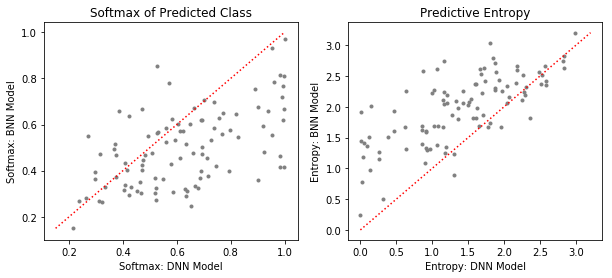

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(det_model_max_softmax, bayes_model_max_softmax, marker='.', color=[0.5, 0.5, 0.5])
combined = np.concatenate((det_model_max_softmax,  bayes_model_max_softmax))
ranges = (np.min(combined), np.max(combined))
ax1.set_xlabel('Softmax: DNN Model')
ax1.set_ylabel('Softmax: BNN Model')
ax1.set_title('Softmax of Predicted Class')
ax1.plot(ranges, ranges, 'r:')
ax2.scatter(det_model_entropy, bayes_model_entropy, marker='.', color=[0.5, 0.5, 0.5])
combined = np.concatenate((det_model_entropy,  bayes_model_entropy))
ranges = (np.min(combined), np.max(combined))
ax2.plot(ranges, ranges, 'r:')
ax2.set_xlabel('Entropy: DNN Model')
ax2.set_ylabel('Entropy: BNN Model')
ax2.set_title('Predictive Entropy')
f.savefig('cifar100-1.png'.format(dataset), dpi=600)

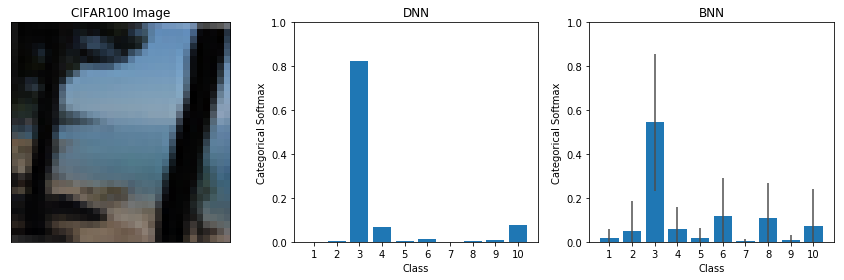

In [11]:
ind = 10
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.imshow(test[0][ind], interpolation='nearest')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('CIFAR100 Image')
ax2.bar(range(1, 11), det_model_output[ind])
ax2.set_ylim([0, 1])
ax2.set_xticks(range(1, 11))
ax2.set_xlabel('Class')
ax2.set_ylabel('Categorical Softmax')
ax2.set_title('DNN')
ax3.bar(range(1, 11), bayes_model_predictions[ind], 
        yerr=np.std(bayes_model_output[ind], axis=0), ecolor=[0.3, 0.3, 0.3])
ax3.set_ylim([0, 1])
ax3.set_xticks(range(1, 11))
ax3.set_xlabel('Class')
ax3.set_ylabel('Categorical Softmax')
ax3.set_title('BNN')
f.tight_layout()
f.savefig('cifar100-2.png'.format(dataset), dpi=600)